# The Goodest Bois: An Analysis of Twitter Data from @WeRateDogs
*A project built to gather a variety of data about @WeRateDogs on Twitter as an opportunity to wrangle data and do some analysis on trends amongst all the goodest puppers and doggos in the world*

Research project performed by William J Townsend for Udacity's Data Analysis NanoDegree Program, Data Wrangling course
9 Sep 2021


## Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gathering)
- [Assessing Data](#assessing)
    - [Tidiness #1](#tidy1)
- [Assessing Data (cont)](#assessing2)
- [Cleaning Data](#cleaning)
- [Data Storage](#storage)
- [Analyzing & Visualizing Data](#analysis)
    - [Pups vs Dogs: Who gets better ratings?](#question1)
    - [Pups vs Dogs: Who gets better engagement?](#question2)
    - [What relationship exists between ratings and engagement?](#question3)
- [Conclusion](#conclusion)
- [References](#references)

<a id='intro'></a>
## Introduction
This project requires the student to put together three datasets relating to the [@WeRateDogs twitter account](https://twitter.com/dog_rates/). An initial .csv is provided with an archive of tweets for this account, and students must programmatically download a .tsv file with dog breed projects. Students also use the `json` and `tweepy` packages in Python to pull data regarding the archived tweets from the Twitter API. With these three tables of data, students then must wrangle the data, put it together, and then analyze that data to come up with at least three insights and one visualization of their choice. 

While many questions could be asked of this data, the three that I decided to focus on for this analysis were:
- Do puppies or full grown dogs get higher ratings, on average?
- Do puppies or full grown dogs tend to get greater engagement on Twitter?
- What is the relationship between engagement with a tweet (retweets, favorites) and the rating issued to a dog?

There were many errors or problems within the dataset, because it is intended as a showcase for students to perform data wrangling operations. My fixes were primarily geared towards facilitating exploratory data analysis and then towards refining the quality of the data to allow me to examine these three questions. 

<a id='gathering'></a>
## Gathering Data
Data is gathered on the @WeRateDogs Twitter account in three ways. First, a .csv file is provided for download within the browser, containing a variety of tweet data. Second, a .tsv file is provided for download, with the requirement it be downloaded programmatically. This file contains data about predictions of each dog's breed made from Udacity's Machine Learning program. Third, the student is to use the `json` and `tweepy` packages to gather data from the Twitter API to get extra information about the tweets provided in the .csv file, including number of retweets and favorites, at a minimum. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:
# Having downloaded the .csv, load its data into a dataframe
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Programmatically download the .tsv file and save to the local directory
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [4]:
# Load data from the tab-separated values spreadsheet into a dataframe
df_preds = pd.read_csv('image-predictions.tsv', sep="\t")
df_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tweepy scripting provided by Udacity
I had created a new Twitter account and applied for development access to the API. I had gotten into the Developer Portal on Twitter, and even got access to my keys for the API. About 10 minutes later, while I was reading through `tweepy` documentation to try to understand how to use it, I received notice that my application was suspended from accessing the Twitter API, before I'd even had a chance to use it. I ended up just using the script here and the tweet_json.txt file provided by Udacity. My API access was reinstated several days later (actually just as I went to turn in this project), by which point I'd already deactivated the account. 

In [5]:
%%script false --no-raise-error # Avoid running this cell - will not work without API keys, takes 15 minutes to run

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tweets.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Couldn't find program: 'false'


In [6]:
# Generate new dataframe for info scraped from Twitter API into tweet_json.txt
df_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as file:
    for line in file:
        status = json.loads(line)
        # Pull each of tweet_id, retweet_count, and favorite_count from json data
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        # Append that data to dataframe
        df_json = df_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], columns=['tweet_id', 'retweet_count', 'favorite_count']))
# Update json index
    df_json = df_json.reset_index(drop=True)
df_json.head()    

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assessing'></a>
## Assessing Data
With three dataframes to explore (`df_tweets`, `df_preds`, and `df_json`), I must explore these datasets both visually and programmatically. With this particular dataset and the nature of tweets (some are standalone, some are replies, some have images, etc.) a lot of the visual exploration had to be done by viewing the actual tweets from @WeRateDogs. I'm going to start with `df_tweets`, the biggest dataframe in the project. I am required to identify and fix two issues of data tidyness and eight issues of data quality in the entire dataset. The project also requires that I make copies of my datasets prior to any cleaning commences. As this dataset is going to require some early cleaning to facilitate iterative assessment, I'll make my copies now:

In [7]:
# Copy original df_tweets to a file
df_tweets.to_csv('df_tweets_original_data_copy.csv', encoding='utf-8', index=False)
# Copy original df_json to a file
df_json.to_csv('df_json_original_data_copy.csv', encoding='utf-8', index=False)
# Copy original df_preds to a file
df_preds.to_csv('df_preds_original_data_copy.csv', encoding='utf-8', index=False)

The project specifically mentions that "retweets" should be removed from this dataset. That's sensible, because retweets are not actually "new" content or data and are essentially "duplicates". A retweet functions similar to a "share" on Facebook, where an individual is simply repeating or signal-amplifying something that someone else said. This means it is not a new post (or "tweet") but instead a re-post (a "re-tweet"). I did check a few of the retweets from @WeRateDogs in browser, and they were very commonly just retweeting prior "highlights" of theirs. Inclusion of this data would definitely amount to counting it twice, so this is a good choice to get rid of. I'm going to choose to get rid of this data now, as well as the associated columns. Only the rows which are retweets have any data in these columns, and all other columns ("original" tweets) are populated with `NaN` in these columns. 

In [8]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# Set df_tweets to only be those rows which have NaN for retweeted_status_id
df_tweets = df_tweets[df_tweets['retweeted_status_id'].isna()]
# Drop the columns associated with retweets
df_tweets.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis='columns', inplace=True)

In [10]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

In [11]:
df_tweets.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
1251,710997087345876993,NaN,NaN,2016-03-19 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo and Amos. They are the best of pals....,https://twitter.com/dog_rates/status/710997087...,12,10,Milo,None,None,None,None
1592,686394059078897668,NaN,NaN,2016-01-11 03:47:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pup's having a nightmare that he forgot t...,https://vine.co/v/iMqBebnOvav,12,10,None,None,None,None,None
1622,684914660081053696,NaN,NaN,2016-01-07 01:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",https://twitter.com/dog_rates/status/684914660...,12,10,None,None,None,None,None
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12,10,by,None,None,None,None
1785,677644091929329666,NaN,NaN,2015-12-18 00:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a dog swinging. I really enjoyed it so...,https://twitter.com/dog_rates/status/677644091...,11,10,a,None,None,None,None
2119,670417414769758208,NaN,NaN,2015-11-28 01:42:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sharp dog here. Introverted. Loves purple. Not...,https://twitter.com/dog_rates/status/670417414...,6,10,None,None,None,None,None
1880,675006312288268288,NaN,NaN,2015-12-10 17:37:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mollie. This pic was taken after ...,https://twitter.com/dog_rates/status/675006312...,10,10,Mollie,None,None,pupper,None
2024,671891728106971137,NaN,NaN,2015-12-02 03:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mojo. Apparently he's too cute for a s...,https://twitter.com/dog_rates/status/671891728...,11,10,Mojo,None,None,None,None


Looking at this, there are some issues which are readily apparent, and some which require further exploration to figure out what is happening with them. 

Issues which are readily apparent as requiring cleaning of some sort are:
- QUALITY ISSUE: `timestamp` should be converted from object to datetime
- QUALITY ISSUE: `expanded_urls` is missing values for a small portion of the tweets in the dataset
- QUALITY ISSUE: `tweet_id` should be converted from int64 to string (this is the unique portion of the tweet's URL)
- TIDINESS ISSUE: `in_reply_to_status_id` & `in_reply_to_user_id` are stored as floats rather than strings, and worse, they're stored in scientific notation making them unusable at present

*Regarding reply-tweets*
This is a complicated issue, and I'm going to tackle it first before other tasks. A "reply" tweet is one which is made in response to another tweet, and 2+ tweets constitute a "thread" of conversation. A reply may be issued in response to another user, or to one's own tweets. In this case, I can look at a tweet by using it's `extended_url` (clickable, if called) or pasting the `tweet_id` into my browser, prefixed with 'https://twitter.com/dog_rates/status/'. In doing some visual exploration of different types of replies, I found a few types of replies:

- Reply to self to amend/affirm a prior rating ([Example](https://twitter.com/dog_rates/status/671550332464455680))
An amended rating is certainly one that we want to keep. In fact, it presents another problem - we actually will want to get rid of the preceding tweet, if its in our dataset, as the prior grade is now rendered inaccurate by additional details, facts, or deliberation. 
- Reply to self to issue new ratings for other dogs ([Example](https://twitter.com/dog_rates/status/802265048156610565))
This is fairly uncommon, as each dog rating is usually placed into its own thread. However, when this happens, it does create a situation where new ratings may not necessarily supercede previous ratings in a thread. 
- Reply to others requesting a rating ([Example](https://twitter.com/dog_rates/status/863427515083354112))
This is a fresh and original rating that we would want to keep in our dataset. It is easily distinguished as being done in response to another user_id, rather than to @WeRateDogs' self. 

We do have the information available to determine if a reply-tweet was made to another party or to @WeRateDogs' self, but that information isn't usable right now because of how the data is stored in floats in scientific notation. Being unable to proceed with this problem until this is addressed, I'll prioritize this before continuing my exploration. 

<a id='tidy1'></a>
**TIDINESS # 1:**  <br>
*PROBLEM: `in_reply_to_status_id` & `in_reply_to_user_id` are type float and in unusable scientific notation, should be string, `tweet_id` is type int and should be string as well (this makes it easier for me to visually explore tweets in browser) <br>
*APPROACH: cast all three to string with `astype()`, `reply` columns will have to be placed into a separate dataframe during conversion due to NaN's and scientific notation <br>
*TESTING: Check 'before' state with a row containing all three columns, and check again after

In [12]:
# Example of what is being operated on (before casting column types)
df_tweets[df_tweets.tweet_id == 671550332464455680]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,1,10,None,None,None,None,None


In [13]:
# Convert tweet_id to string
df_tweets['tweet_id'] = df_tweets['tweet_id'].astype(str)
# Placing non-null reply-id's into a new dataframe, with no NaN's 
to_convert = df_tweets[df_tweets['in_reply_to_status_id'].notnull()].copy()
# Convert all reply-id's into integer (to remove scientific notation) and then string (to change type)
to_convert['in_reply_to_status_id'] = to_convert['in_reply_to_status_id'].astype(np.int64).astype(str)
to_convert['in_reply_to_user_id'] = to_convert['in_reply_to_user_id'].astype(np.int64).astype(str)

This conversion was difficult, because conversion of the entire column from float to string would preserve the e- portions of scientific notation, meaning that characters were lost which are needed for the URL. Conversion to integer preserves the full data within the float, but cannot be applied to the entire `df_tweets` column because `NaN` values in Pandas cannot be an integer (float or string). Placing these values into a new dataframe (with no `NaN`s) allows for conversion to integer (to get all digits) and then to string, and then these strings can be placed back into `df_tweets`. 

In [14]:
# Replace values in df_tweets with the converted values from to_convert
df_tweets['in_reply_to_status_id'] = to_convert['in_reply_to_status_id']
df_tweets['in_reply_to_user_id'] = to_convert['in_reply_to_user_id']
# Check the example row
df_tweets[df_tweets.tweet_id == '671550332464455680']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2038,671550332464455680,671544874165002240,4196983835,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,1,10,None,None,None,None,None


In [15]:
df_tweets.info()
# Example row checks out, so do datatypes, issue is resolved

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2175 non-null   object
 1   in_reply_to_status_id  78 non-null     object
 2   in_reply_to_user_id    78 non-null     object
 3   timestamp              2175 non-null   object
 4   source                 2175 non-null   object
 5   text                   2175 non-null   object
 6   expanded_urls          2117 non-null   object
 7   rating_numerator       2175 non-null   int64 
 8   rating_denominator     2175 non-null   int64 
 9   name                   2175 non-null   object
 10  doggo                  2175 non-null   object
 11  floofer                2175 non-null   object
 12  pupper                 2175 non-null   object
 13  puppo                  2175 non-null   object
dtypes: int64(2), object(12)
memory usage: 254.9+ KB


<a id='assessing2'></a>
## Assessing Data (continued)

With the `in_reply_to_status_id` and `in_reply_to_user_id` fields fixed, I can now start looking into the replies to see how frequently replies are made to self (@WeRateDogs) or to others, and to examine the content of those replies. 

In [16]:
df_tweets.in_reply_to_user_id.value_counts()

4196983835            47
21955058               2
2281181600             1
113211856              1
16374678               1
467036706              1
1198988510             1
28785486               1
2319108198             1
358972768              1
4717297476             1
15846407               1
730505014150582272     1
29166305               1
291859009              1
11856342               1
20683724               1
1582853809             1
47384430               1
30582082               1
26259576               1
2894131180             1
840547864354918400     1
13615722               1
194351775              1
279280991              1
180670967              1
77596200               1
16487760               1
3105440746             1
21435658               1
Name: in_reply_to_user_id, dtype: int64

This shows a total of 47 replies to self, of 78 replies total. I verified that the user_id '4196983835' was @WeRateDogs by replacing 'https://twitter.com/dog_rates/status/671550332464455680' with 'https://twitter.com/4196983835/status/671550332464455680' and opening this link in a new browser tab, and it worked without issue, automatically filling in the user_id with the user's Twitter handle. Sorting through several of the 31 replies to other users, these seemed to be of the "please rate my dog" variety, resulting in new ratings which should remain a part of the dataset. Of the remaining 47 replies to self, I took a sample of 10 of them to look into and see what they were consisting of.

In [17]:
df_tweets.query('in_reply_to_user_id =="4196983835"').sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
843,766714921925144576,766711819364888576,4196983835,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",His name is Charley and he already has a new s...,NaN,13,10,None,None,None,None,None
1774,678023323247357953,678021115718029312,4196983835,2015-12-19 01:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After getting lost in Reese's eyes for several...,NaN,13,10,None,None,None,None,None
1339,704871453724954624,667152164079423488,4196983835,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,https://twitter.com/dog_rates/status/704871453...,12,10,None,None,None,None,None
234,847617282490613760,847606175596138496,4196983835,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@breaannanicolee PUPDATE: Cannon has a heart ...,NaN,13,10,None,None,None,None,None
1605,685681090388975616,685547936038666240,4196983835,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jack deserves another round of applause. If yo...,NaN,14,10,None,None,None,None,None
1892,674754018082705410,674752233200820224,4196983835,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None
1497,692423280028966913,692417313023332352,4196983835,2016-01-27 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: just noticed this dog has some extra ...,NaN,9,10,None,None,None,None,None
1885,674793399141146624,671729906628341760,4196983835,2015-12-10 03:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have found another. 13/10 https://t.co/HwroP...,https://twitter.com/dog_rates/status/674793399...,13,10,None,None,None,None,None
1330,705786532653883392,703255935813287936,4196983835,2016-03-04 16:06:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",https://twitter.com/dog_rates/status/705786532...,11,10,None,None,None,pupper,None
228,848213670039564288,848212111729840128,4196983835,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,11,10,None,None,None,None,None


The 10 tweets that were pulled in my original sample were opened in my browser and I made the following observations:

| Index | Observation                      |
|:-----:|----------------------------------|
|  184  | update/confirm prior score       |
|  234  | update/confirm prior score       |
|  513  | update/confirm prior score       |
|  843  | update/confirm prior score       |
|  1330 | no update, new dog rating        |
|  1452 | no rating of dog, rating of meme |
|  1464 | no update, new dog rating        |
|  1605 | update/confirm prior score       |
|  1905 | update/confirm prior score       |
|  2149 | update/confirm prior score       |

Of these 10 observations, 7 of 10 were updates of prior scores, 1 was a rating of a meme, and 2 were ratings of new dogs.

I considered going through all 47 replies (I'd already gone through 10), but that would be cumbersome. I decided the most efficient way to go about this was to check if the tweet ID being replied to is in this dataset, and if so, then I should drop the prior tweet and defer to the newer tweet. If the tweet ID being replied to is not in this dataset, then it can remain because this will indicate a new rating of a dog to be added to this data. 

This would cause me to lose threads where multiple dogs are rated separately in different posts within that thread. I am aware of one such occasion where this occurred, from plugging several random tweets into my browser by ID. However, this seems to be a very small minority of the "replied to self" data and should in the meantime increase the accuracy of the dataset by making sure that outdated ratings are not mistakenly included. 

- QUALITY ISSUE: filter through reply tweets by reply_to fields to remove "outdated" ratings and retain modified ratings

Continuing my assessment of the data, I looked into the final four columns of `df_tweets`: `doggo`, `floofer`, `pupper`, and `puppo`. These were stipulated in the Udacity project as [dog "stages"](https://camo.githubusercontent.com/3c0fb51a06293939405b5f7717dfa0a96fd195711fd9bc565965510e44411e89/68747470733a2f2f64313768323774366835313561352e636c6f756466726f6e742e6e65742f746f706865722f323031372f4f63746f6265722f35396530346365625f646f6774696f6e6172792d636f6d62696e65642f646f6774696f6e6172792d636f6d62696e65642e706e67), with a minority of dogs being identified as one of those four categories. We can already see that many of these are incorrectly stored as 'None' rather than `NaN`, which is an important distinction - the absence of a value is not the same as saying "Not a doggo". This is also splitting one variable (a dogs combined age, size and maturity summed up as "stage of life") across four columns. There's a couple issues here that need fixing:
- TIDINESS ISSUE: 'doggo', 'floofer', 'pupper', and 'puppo' should be combined into one 'dog_stage' column
- QUALITY ISSUE: 'None' values for 'dog_stage' should be `NaN`

With those major structural issues identified, I started exploring some of the values in the dataset. While doing random sampling of the database with `.sample()`, I found an issue with the 'name' column:

In [18]:
df_tweets.name.value_counts()

None          680
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

In [19]:
df_tweets.iloc[53]

tweet_id                                                881536004380872706
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                        2017-07-02 15:32:16 +0000
source                   <a href="http://twitter.com/download/iphone" r...
text                     Here is a pupper approaching maximum borkdrive...
expanded_urls            https://twitter.com/dog_rates/status/881536004...
rating_numerator                                                        14
rating_denominator                                                      10
name                                                                     a
doggo                                                                 None
floofer                                                               None
pupper                                                              pupper
puppo                    

With the `name` column, it's clear that many of the dogs rated here did not have names provided. These are stored as 'None' rather than `NaN`. This is arguably incorrect, but not particularly important because the column will be stored as a string anyways. What is noticeably incorrect though is that 55 dogs have been named "a". This appears to be because the "name" field was generated by taking whatever word came after "This is" or "Here is" without regard to length, if it started with a capital letter, etc. This inaccurate data does need to be addressed:
- QUALITY ISSUE: Fix dogs incorrectly named as "a"

In [20]:
df_tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

This source column appears to be pretty pointless. If I'm understanding it correctly, it just shows how the data was accessed, with the vast majority using the same method (from iPhone, it seems). This isn't really relevant, as we're interested in the content itself and not how that content was accessed. As a result, this column can be dropped.
- QUALITY ISSUE: Drop the 'source' column

Finally, let's look at the meat of @WeRateDogs - the dog ratings!

In [21]:
df_tweets.rating_denominator.value_counts()

10     2153
50        3
11        2
20        2
80        2
15        1
70        1
7         1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [22]:
df_tweets.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
17        1
45        1
60        1
143       1
44        1
99        1
121       1
20        1
26        1
144       1
80        1
165       1
50        1
204       1
1776      1
27        1
75        1
24        1
84        1
960       1
15        1
182       1
666       1
88        1
Name: rating_numerator, dtype: int64

Dogs are generally rated on out of 10 (the denominator), but the numerator is frequently over 10 because doggos are just such heckin' good bois. While that is a feature of this platform, these are almost exclusively a 10, 11, 12, or 13. 14's are extremely rare, with [the first 14/10 given to a dog who saved another dog's life](https://twitter.com/dog_rates/status/685681090388975616)! As a result, I was skeptical of some of these extremely high values for both numerator and denominator. Fortunately, it is not a large number of dog ratings coming in over a 15, so I decided to go through them all and make some observations.

In [23]:
df_tweets[df_tweets.rating_numerator > 14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,None,None,None
188,855862651834028034,855861584463351808,194351775,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,None,None,None
189,855860136149123072,855858535607001088,13615722,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666,10,None,None,None,None,None
290,838150277551247360,838145498691194880,21955058,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,182,10,None,None,None,None,None
291,838085839343206401,838085539362402304,2894131180,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,15,10,None,None,None,None,None
313,835246439529840640,835245984028504064,26259576,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


With all rows in hand for the dogs who earned ratings over 14, I started looking through all of them, and this is what I found: 

| Index |                                    Tweet ID                                   | Observation                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|:-----:|:-----------------------------------------------------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   55  | [881633300179243008](https://twitter.com/dog_rates/status/881633300179243008) | is not a dog rating                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|  188  | [855862651834028034](https://twitter.com/dog_rates/status/855862651834028034) | is not a dog rating, referring to prior Snoop Dogg rating                                                                                                                                                                                                                                                                                                                                                                                                |
|  189  | [855860136149123072](https://twitter.com/dog_rates/status/855860136149123072) | account submitting for rating has been suspended, tweet appears to be rating owner, not dog                                                                                                                                                                                                                                                                                                                                                              |
|  290  | [838150277551247360](https://twitter.com/dog_rates/status/838150277551247360) | rating of 182 is a rating for Mark Hoppus. Mark Hoppus is, of course, one third of world renowned pop punk band Blink 182. (Fun Fact: Blink 182's "Take Off Your Pants And Jacket" tour was my very first concert, when I was in 8th grade.) This rating could be a rating of either Mark or of his dog, but the original tweet is unavailable and deleted. In the absence of any evidence of which was being rated, this should be removed. |
|  291  | [838085839343206401](https://twitter.com/dog_rates/status/838085839343206401) | is not a rating, is stating that no 15/10 has been found                                                                                                                                                                                                                                                                                                                                                                                                 |
|  313  | [835246439529840640](https://twitter.com/dog_rates/status/835246439529840640) | is specifically telling a user that 960/00 isn't a valid rating, and suggests 13/10 instead                                                                                                                                                                                                                                                                                                                                                              |
|  433  | [820690176645140481](https://twitter.com/dog_rates/status/820690176645140481) | is a rating of a litter of 7 puppos, at 84/70 (12/10)                                                                                                                                                                                                                                                                                                                                                                                                    |
|  516  | [810984652412424192](https://twitter.com/dog_rates/status/810984652412424192) | is not a dog rating                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|  695  | [786709082849828864](https://twitter.com/dog_rates/status/786709082849828864) | was not scored at 75, was scored at 9.75/10                                                                                                                                                                                                                                                                                                                                                                                                              |
|  763  | [778027034220126208](https://twitter.com/dog_rates/status/778027034220126208) | was not scored at 27, was scored at 11.27/10                                                                                                                                                                                                                                                                                                                                                                                                             |
|  902  | [758467244762497024](https://twitter.com/dog_rates/status/758467244762497024) | is a rating of a litter of 15 puppos, at 165 / 150 (11/10)                                                                                                                                                                                                                                                                                                                                                                                               |
|  979  | [749981277374128128](https://twitter.com/dog_rates/status/749981277374128128) | this really is a rating of 1776 / 10 of a doggo exhibiting much patriotism. Such wow!                                                                                                                                                                                                                                                                                                                                                                    |
|  1120 | [731156023742988288](https://twitter.com/dog_rates/status/731156023742988288) | is a rating of a group of 17 dogs, at 204/170 (12/10)                                                                                                                                                                                                                                                                                                                                                                                                    |
|  1202 | [716439118184652801](https://twitter.com/dog_rates/status/716439118184652801) | was not rated at 50/50, was rated at 11/10                                                                                                                                                                                                                                                                                                                                                                                                               |
|  1228 | [713900603437621249](https://twitter.com/dog_rates/status/713900603437621249) | is a rating of a litter of 9 puppos at 99/90 (11/10)                                                                                                                                                                                                                                                                                                                                                                                                     |
|  1254 | [710658690886586372](https://twitter.com/dog_rates/status/710658690886586372) | is a rating of a litter of 8 puppos at 80/80 (10/10)                                                                                                                                                                                                                                                                                                                                                                                                     |
|  1274 | [709198395643068416](https://twitter.com/dog_rates/status/709198395643068416) | is a rating of 5 doggos together failing to look at camera at 45/50 (9/10)                                                                                                                                                                                                                                                                                                                                                                               |
|  1351 | [704054845121142784](https://twitter.com/dog_rates/status/704054845121142784) | is a rating of a litter of 5 puppos at 60/50 (12/10)                                                                                                                                                                                                                                                                                                                                                                                                     |
|  1433 | [697463031882764288](https://twitter.com/dog_rates/status/697463031882764288) | is a rating of a litter of 5 puppos at 44/40 (11/10)                                                                                                                                                                                                                                                                                                                                                                                                     |
|  1634 | [684225744407494656](https://twitter.com/dog_rates/status/684225744407494656) | is a rating of litter of 13 puppos at 143/130 (11/10)                                                                                                                                                                                                                                                                                                                                                                                                    |
|  1635 | [684222868335505415](https://twitter.com/dog_rates/status/684222868335505415) | this rating was updated in a reply and will be deleted when replies are handled                                                                                                                                                                                                                                                                                                                                                                          |
|  1663 | [682808988178739200](https://twitter.com/dog_rates/status/682808988178739200) | is not a dog rating                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|  1712 | [680494726643068929](https://twitter.com/dog_rates/status/680494726643068929) | was not scored at 26, was scored at 11.26/10                                                                                                                                                                                                                                                                                                                                                                                                             |
|  1779 | [677716515794329600](https://twitter.com/dog_rates/status/677716515794329600) | is a rating of litter of 14 puppos at 144/120 (12/10)                                                                                                                                                                                                                                                                                                                                                                                                    |
|  1843 | [675853064436391936](https://twitter.com/dog_rates/status/675853064436391936) | is a rating of litter of 8 puppos at 88/80 (11/10)                                                                                                                                                                                                                                                                                                                                                                                                       |
|  2074 | [670842764863651840](https://twitter.com/dog_rates/status/670842764863651840) | is not a dog rating, is a Dogg rating of 420/10                                                                                                                                                                                                                                                                                                                                                                                                          |

While this could've possibly been done programatically, I believe visual assessment was more appropriate here. Checking these visually in browser provided context such as replies or writer's intent, and the associated images for pupper count, where each puppy in a litter contributes to the overall litter's rating. With this data gathered, several quality issues become apparent:

- QUALITY ISSUE: Delete ratings which are not ratings of dogs, or for which the original rating is unclear if it is for the owner or the dog or is rating Snoop Dogg
- QUALITY ISSUE: Correct numerators and denominators for group/litter ratings
- QUALITY ISSUE: Cast numerator column as float
- QUALITY ISSUE: Correct ratings for ratings given in decimal form

This does leave the one single outlier of [Atticus, the radically patriotic dog on 4 Jul 2016](https://twitter.com/dog_rates/status/749981277374128128). It seems fair to chalk this up as an extreme outlier in an unbridled fit of patriotism in the more promising before-times. This would seem to be supported by the statement in [this post](https://twitter.com/dog_rates/status/838085839343206401) from near the chronological end of this dataset, stating that a 15/10 has not yet been found. While I could delete this rating, this seems unfair to an indisputably good boi, so I'm going to instead amend the rating from 1776 to 14, the maximum left in the current dataset. In this way, Atticus can be represented without breaking the comparison to other dogs. 
- QUALITY ISSUE: Correct rating for Atticus, patriotic woofboy from 1776/10 to 14/10

This takes care of the most glaring issues with the numerators, but it would be worthwhile to check for problems with the denominators, excluding those issues already discovered above: 

In [24]:
df_tweets[df_tweets['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,835245984028504064,26259576,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,None,None,None,None
342,832088576586297345,832087547559997440,30582082,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None


Excluding tweets that have already been noted as problems, there are 6 more tweets which do not have a denominator of 10. In each case in the above table, this was an error. I'll check visually through these other 6 tweets to determine if any of these are also errors to be addressed.  

| Index |                                    Tweet ID                                   | Observation                                                   |
|:-----:|:-----------------------------------------------------------------------------:|:--------------------------------------------------------------|
|  342  | [832088576586297345](https://twitter.com/dog_rates/status/832088576586297345) | Not a rating                                                  |
|  1068 | [740373189193256964](https://twitter.com/dog_rates/status/740373189193256964) | This was the second 14/10, the last surviving 9/11 search dog |
|  1165 | [722974582966214656](https://twitter.com/dog_rates/status/722974582966214656) | This was not a 4/20, this was a 13/10 on 4/20                 |
|  1598 | [686035780142297088](https://twitter.com/dog_rates/status/686035780142297088) | This is explaining why the preceding rating wasn't a 4/20     |
|  1662 | [682962037429899265](https://twitter.com/dog_rates/status/682962037429899265) | This is a 10/10 for a dog who robbed a 7/11                   |
|  2335 | [666287406224695296](https://twitter.com/dog_rates/status/666287406224695296) | This is a 9/10 for a 3 1/2 legged dog                         |

The two findings which are not ratings will have to be deleted. The remaining four will have to be fixed. This generates another quality issue to be addressed:
- QUALITY ISSUE: Correct ratings (numerator and denominator) for remaining tweets with denominator unequal to 10

In [25]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [26]:
df_json.sample(10)

,tweet_id,retweet_count,favorite_count
2094,670755717859713024,123,475
1457,695064344191721472,685,1771
745,780074436359819264,5815,13723
323,834086379323871233,2512,14296
160,860563773140209665,2334,7878
1245,711652651650457602,1037,4228
1263,709901256215666688,112,732
1010,747242308580548608,3257,0
2284,667182792070062081,6618,15075
465,817171292965273600,2326,9690


In [27]:
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,892420643555336193,1972,0
freq,1,5,179


`df_json` doesn't appear to have any NaN values, and the values for number of retweets or favorites can be any positive integer. Where we've had many numeric values needing to be stored as strings, in this case, these counts should be integers, so this will need to be addressed. It will be necessary to cast 'tweet_id' as a string, so that these strings can be joined to the matching strings in `df_tweets`. We can also see from `describe()` that the values in the retweet & favorite columns do make sense and there don't appear to be any issues with that data. The data in df_json should be joined to the tweet-level data/metrics recorded in `df_tweets`, as this information is just as much a part of the tweet as any of the data there. Also, something which will be useful for the analysis portion of this study is to generate a "total engagement" column, which retweets and favorites are both examples of. 

- QUALITY ISSUE: On `df_json`, cast 'retweet_count' and 'favorite_count' as integers, and 'tweet_id' as string
- TIDINESS ISSUE: In `df_json`, no column exists to measure total engagement, which retweets and favorites are both examples of 
- TIDINESS ISSUE: Join `df_json` to `df_tweets`

In [28]:
df_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_preds.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
191,669564461267722241,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,1,toy_poodle,0.623685,True,miniature_poodle,0.259920,True,standard_poodle,0.082530,True
1650,809220051211603969,https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg,1,Pomeranian,0.819511,True,Samoyed,0.141241,True,Pembroke,0.013455,True
554,677644091929329666,https://pbs.twimg.com/ext_tw_video_thumb/67764...,1,Chihuahua,0.626236,True,Italian_greyhound,0.128483,True,swing,0.059840,False
1052,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True
1374,762699858130116608,https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg,1,kelpie,0.519047,True,German_shepherd,0.296069,True,dingo,0.061005,False
2003,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke,0.931120,True,Cardigan,0.068698,True,basenji,0.000082,True
467,675047298674663426,https://pbs.twimg.com/media/CV4_8FgXAAQOj4S.jpg,1,Samoyed,0.978007,True,chow,0.007121,True,Pomeranian,0.006398,True
826,693280720173801472,https://pbs.twimg.com/media/CZ8HIsGWIAA9eXX.jpg,1,Labrador_retriever,0.340008,True,bull_mastiff,0.175316,True,box_turtle,0.164337,False
205,669923323644657664,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,1,car_mirror,0.343063,False,seat_belt,0.110289,False,wing,0.080148,False
1909,852912242202992640,https://pbs.twimg.com/media/C9YnKK3VoAAxn1E.jpg,1,Great_Dane,0.783765,True,Rhodesian_ridgeback,0.114147,True,English_foxhound,0.046440,True


In [30]:
df_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
sum(df_preds.img_num > 1)

295

The `df_preds` table requires a bit of explanation. The 'p1...', 'p2...', and p3...' columns measure columns are the three predictions from machine learning software of what this dog is. This prediction is generally an attempt to identify a dog's breed, but it seems to have misidentified dogs as other objects - 'dogsled', 'hyena', 'meerkat', 'tub', and 'hippopotamus' are all non-dog results that have been predicted based upon a dog's pictures. The prediction is then followed by a coefficient indicating the confidence of the program in that guess of "breed", and then a Boolean follows indicating whether that prediction was actually a dog. This is an important distinction, as this is not evaluating whether or not the guess was correct or not, but merely if that guess was a dog. 

In terms of noticeable issues here, the 'tweet_id' column is again incorrectly cast and will have to be modified to a string from an integer, as was done previously. Running through several samples from this data, I don't see any issues in any of the prediction data, and the numeric data presented by `describe()` doesn't highlight any obvious problems either. Where a concern potentially does exist is in the interaction between 'img_num' (number of images attached to the post, up to 4 at maximum) and 'jpg_url'. For observations with more than 1 picture attached to the tweet, the 'jpg_url' appears to only have the link for the final image. This is not a problem for tweets with only 1 image, but those tweets with more than 1 image are missing links to the images preding the last image. This is 295 tweets total that are effected, though some of these may be excluded upon joining with the `df_tweets` table if the associated tweet is a retweet or other tweet that is being deleted from the dataset. This may present an issue for anyone using this dataset for machine learning models, but that is not the point of this analysis, so it will not be addressed here. 

- QUALITY ISSUE: `df_preds` 'tweet_id' needs to be cast as string

Regarding tidiness, `df_preds` is not really relevant to the rest of the data in `df_tweets` and `df_json`. Those two datasets certainly complement each other, as each contains details directly relevant to the tweets from @WeRateDogs - IDs and URLs for the tweets themselves, the content of the tweet (ratings, text, etc.), and information about engagement with that tweet (retweets, favorites). Machine learning predictions are not specifically relevant to the tweets themselves and constitute separate observations stemming from the content of those tweets. As such, this would be inappropriate to include in the other joined data. 

<a id='cleaning'></a>
## Cleaning Data

Having examined and assessed all three datasets, I've compiled the following issues that need to be addressed before analysis of the data may begin:
- TIDINESS ISSUE # 1: In `df_tweets`, 'in_reply_to_status_id' & 'in_reply_to_user_id' are stored as floats rather than strings, and worse, they're stored in scientific notation making them unusable at present
- QUALITY ISSUE # 1: In `df_tweets`, 'timestamp' should be converted from object to datetime, 'tweet_id' should be converted from int64 to string (this is the unique portion of the tweet's URL)
- QUALITY ISSUE # 2: In `df_tweets`, `expanded_urls` is missing values for a small portion of the tweets in the dataset
- QUALITY ISSUE # 3: In `df_tweets`, the 'source' column is irrelevant
- QUALITY ISSUE # 4: In `df_tweets`, some dogs are incorrectly named "a"
- QUALITY ISSUE # 5: In `df_tweets`, 'None' values for 'dog_stage' should be `NaN`
- TIDINESS ISSUE # 2: In `df_tweets`, 'doggo', 'floofer', 'pupper', and 'puppo' should be combined into one 'dog_stage' column
- QUALITY ISSUE # 6: In `df_tweets`, filter through reply tweets by reply_to fields to remove "outdated" ratings and retain modified ratings
- QUALITY ISSUE # 7: In `df_tweets`, delete ratings which are not ratings of dogs, or for which the original rating is unclear if it is for the owner or the dog or is rating Snoop Dogg
- QUALITY ISSUE # 8: In `df_tweets`, correct numerators and denominators for group/litter ratings
- QUALITY ISSUE # 9: In `df_tweets`, cast numerator column as float
- QUALITY ISSUE # 10: In `df_tweets`, correct ratings for ratings given in decimal form
- QUALITY ISSUE # 11: In `df_tweets`, correct rating for Atticus, patriotic woofboy from 1776/10 to 14/10
- QUALITY ISSUE # 12: In `df_tweets`, correct ratings for remaining tweets with denominator unequal to 10
- QUALITY ISSUE # 13: In `df_json`, cast 'retweet_count' and 'favorite_count' as integers, and 'tweet_id' as string
- TIDINESS ISSUE # 3: In `df_json`, no column exists to measure total engagement, which retweets and favorites are both examples of 
- TIDINESS ISSUE # 4: Join `df_json` to `df_tweets`
- QUALITY ISSUE # 14: In`df_preds`, 'tweet_id' needs to be cast as string

Tidiness # 1 was already addressed above during the "Assessing Data" portion of this report, as it was necessary to continue exploring a portion of the data. The remaining issues will be addressed here:

**QUALITY # 1:**  <br>
*PROBLEM: In `df_tweets`, 'timestamp' should be converted from object to datetime, 'tweet_id' should be converted from int64 to string (this is the unique portion of the tweet's URL) <br>
*APPROACH: 'tweet_id' was already corrected above, alongside TIDINESS # 1, to make it easier to grab Tweet IDs for visual assessment. 'timestamp' can be converted with `to_datetime()` <br>
*TESTING: Check datatypes with `df_tweets.info()` <br>

In [32]:
# Set datatype to datetime
df_tweets.timestamp = pd.to_datetime(df_tweets.timestamp)

In [33]:
df_tweets.info()
# Datatype is correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     object             
 2   in_reply_to_user_id    78 non-null     object             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

**QUALITY # 2:**  <br>
*PROBLEM: In `df_tweets`, `expanded_urls` is missing values for a small portion of the tweets in the dataset <br>
*APPROACH: Synthesize missing links by concatenating a prefix string 'https://twitter.com/dog_rates/status/' to 'tweet_id' <br>
*TESTING: Check a row missing a link before and after fix to verify url is correctly generated and working

In [34]:
# Expanded URL is missing
df_tweets.iloc[29]

tweet_id                                                886267009285017600
in_reply_to_status_id                                   886266357075128320
in_reply_to_user_id                                             2281181600
timestamp                                        2017-07-15 16:51:35+00:00
source                   <a href="http://twitter.com/download/iphone" r...
text                     @NonWhiteHat @MayhewMayhem omg hello tanner yo...
expanded_urls                                                          NaN
rating_numerator                                                        12
rating_denominator                                                      10
name                                                                  None
doggo                                                                 None
floofer                                                               None
pupper                                                                None
puppo                    

In [35]:
# Fill NaN values with prefix string + tweet_id
df_tweets.expanded_urls.fillna('https://twitter.com/dog_rates/status/' + df_tweets.tweet_id, inplace=True)

In [36]:
# Expanded URL is filled with clickable link
df_tweets.iloc[29]

tweet_id                                                886267009285017600
in_reply_to_status_id                                   886266357075128320
in_reply_to_user_id                                             2281181600
timestamp                                        2017-07-15 16:51:35+00:00
source                   <a href="http://twitter.com/download/iphone" r...
text                     @NonWhiteHat @MayhewMayhem omg hello tanner yo...
expanded_urls            https://twitter.com/dog_rates/status/886267009...
rating_numerator                                                        12
rating_denominator                                                      10
name                                                                  None
doggo                                                                 None
floofer                                                               None
pupper                                                                None
puppo                    

**QUALITY # 3:**  <br>
*PROBLEM: In `df_tweets`, the 'source' column is irrelevant <br>
*APPROACH: Drop 'source' column from `df_tweets` <br>
*TESTING: Use `df_tweets.info()` to verify column is dropped <br>

In [37]:
# Drop 'source' column, apply drop to df_tweets in place
df_tweets.drop('source', axis=1, inplace=True)

In [38]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     object             
 2   in_reply_to_user_id    78 non-null     object             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   text                   2175 non-null   object             
 5   expanded_urls          2175 non-null   object             
 6   rating_numerator       2175 non-null   int64              
 7   rating_denominator     2175 non-null   int64              
 8   name                   2175 non-null   object             
 9   doggo                  2175 non-null   object             
 10  floofer                2175 non-null   object             
 11  pupper                 2175 non-null   object           

**QUALITY # 4:**  <br>
*PROBLEM: In `df_tweets`, some dogs are incorrectly named "a" <br>
*APPROACH: Use `replace()` to replace dogs named "a" with "None" instead <br>
*TESTING: Check `value_counts()` for name column before and after fix <br>

In [39]:
df_tweets.name.value_counts()

None          680
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

In [40]:
df_tweets.name = df_tweets.name.replace('a', 'None')

In [41]:
df_tweets.name.value_counts()

None          735
Charlie        11
Lucy           11
Oliver         10
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 955, dtype: int64

**QUALITY # 5:**  <br>
*PROBLEM: In `df_tweets`, 'None' values for 'dog_stage' should be `NaN` <br>
*APPROACH: Use `replace()` to replace "None" dog_stage with `NaN` <br>
*TESTING: Check `df_tweets.info()` to verify existence of NaN values for columns after replacement <br>

In [42]:
df_tweets.doggo.value_counts()

None     2088
doggo      87
Name: doggo, dtype: int64

In [43]:
# Separate dictionaries for each column, each dictionary replaces 'None' with NaN
df_tweets.replace({'doggo':{'None':np.nan}, 
                   'floofer':{'None':np.nan}, 
                   'pupper':{'None':np.nan}, 
                   'puppo':{'None':np.nan},}, inplace=True)

In [44]:
df_tweets.info()
# Total of 349 non-null objects across all four columns (which will populate dog_stage shortly)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     object             
 2   in_reply_to_user_id    78 non-null     object             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   text                   2175 non-null   object             
 5   expanded_urls          2175 non-null   object             
 6   rating_numerator       2175 non-null   int64              
 7   rating_denominator     2175 non-null   int64              
 8   name                   2175 non-null   object             
 9   doggo                  87 non-null     object             
 10  floofer                10 non-null     object             
 11  pupper                 234 non-null    object           

**TIDINESS # 2:**  <br>
*PROBLEM: 'doggo', 'floofer', 'pupper', and 'puppo' should be combined into one 'dog_stage' column <br>
*APPROACH: Concatenate columns to join the right value (doggo, pupper, etc.) with empty columns to create the right value <br>
*TESTING: Use `df_tweets.info()` to check for all 349 records <br>

In [45]:
# Generate 'dog_stage' by concatenating all four columns, replacing NaNs with empty strings
df_tweets['dog_stage'] = df_tweets['doggo'].str.cat(df_tweets[['floofer', 'pupper', 'puppo']], na_rep='')
# Replace empty strings with NaNs
df_tweets['dog_stage'] = df_tweets.dog_stage.replace("", np.nan)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     object             
 2   in_reply_to_user_id    78 non-null     object             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   text                   2175 non-null   object             
 5   expanded_urls          2175 non-null   object             
 6   rating_numerator       2175 non-null   int64              
 7   rating_denominator     2175 non-null   int64              
 8   name                   2175 non-null   object             
 9   doggo                  87 non-null     object             
 10  floofer                10 non-null     object             
 11  pupper                 234 non-null    object           

In [46]:
# Checking the actual values present in the column
df_tweets.dog_stage.value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [47]:
# Looking for all 'doggopuppo' errors
df_tweets.query('dog_stage == "doggopuppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,NaN,NaN,puppo,doggopuppo


Where we were expecting each row to have a single "stage" of "doggo", "puppo", etc., we found 12 results with two stages. It appears that some dogs got two stages, such as this example with 'doggopuppo', where dogs received both 'doggo' and 'puppo' stages. Looking at the text here, it appears that both the words 'doggo' and 'puppo' were used, so both were scraped. The text here clearly indicates that this is a 'puppo', and looking at the tweet and the associated image, we can clearly see that 'puppo' is consistent with this labrador's smol stature and puppo-like comportment. This row should be updated to reflect that this is a puppo, but I'll have to continue looking at the other problems in this column.

In [48]:
df_tweets.dog_stage.replace('doggopuppo', 'puppo', inplace=True)

In [49]:
# Looking for all 'doggofloofer' errors
df_tweets.query('dog_stage == "doggofloofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,NaN,NaN,doggofloofer


In [50]:
# This one is a doggo, misidentified as a "Rare Canadian Floofer Owl"
df_tweets.dog_stage.replace('doggofloofer', 'doggo', inplace=True)

In [51]:
# Looking for all 'doggopupper' errors
df_tweets.query('dog_stage == "doggopupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,NaN,pupper,NaN,doggopupper
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,NaN,pupper,NaN,doggopupper
565,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,NaN,pupper,NaN,doggopupper
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,NaN,pupper,NaN,doggopupper
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,NaN,pupper,NaN,doggopupper
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20+00:00,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,NaN,pupper,NaN,doggopupper
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,NaN,pupper,NaN,doggopupper
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,NaN,pupper,NaN,doggopupper
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48+00:00,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN,doggopupper
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,NaN,pupper,NaN,doggopupper


This provides 10 errors which will have to be examined visually:

| Index |                                     Tweet                                     | Observation                                                                                     |
|:-----:|:-----------------------------------------------------------------------------:|-------------------------------------------------------------------------------------------------|
|  460  | [817777686764523521](https://twitter.com/dog_rates/status/817777686764523521) | This is a pupper ('doggo' is in the associated Instagram handle)                                |
|  531  | [808106460588765185](https://twitter.com/dog_rates/status/808106460588765185) | This is a rating for two dogs, one a puppo and one a doggo. We need to dupe this and correct it |
|  565  | [802265048156610565](https://twitter.com/dog_rates/status/802265048156610565) | This is a rating for two dogs, one a puppo and one a doggo. We need to dupe this and correct it |
|  575  | [801115127852503040](https://twitter.com/dog_rates/status/801115127852503040) | This is a pupper and his stuffed animal doggo                                                   |
|  705  | [785639753186217984](https://twitter.com/dog_rates/status/785639753186217984) | This is a hedgehog in a top hat! Delete spiky impupster!                                        |
|  733  | [781308096455073793](https://twitter.com/dog_rates/status/781308096455073793) | This is a rating for two dogs, one a puppo and one a doggo. We need to dupe this and correct it |
|  889  | [759793422261743616](https://twitter.com/dog_rates/status/759793422261743616) | This is a rating for two dogs, one a puppo and one a doggo. We need to dupe this and correct it |
|  956  | [751583847268179968](https://twitter.com/dog_rates/status/751583847268179968) | This is a doggo hiding                                                                          |
|  1063 | [741067306818797568](https://twitter.com/dog_rates/status/741067306818797568) | This is a rating for two dogs, one a puppo and one a doggo. We need to dupe this and correct it |
|  1113 | [733109485275860992](https://twitter.com/dog_rates/status/733109485275860992) | This is a rating for two dogs, one a puppo and one a doggo. We need to dupe this and correct it |

In [52]:
# Update index 460 to 'pupper'
df_tweets.at[460, 'dog_stage'] = 'pupper'
# Update index 575 to 'pupper'
df_tweets.at[575, 'dog_stage'] = 'pupper'
# Delete impupster
df_tweets.drop(705, axis=0, inplace=True)
# Update index 956 to 'doggo'
df_tweets.at[956, 'dog_stage'] = 'doggo'

Each of the remaining 6 errors here represents both a pupper and a doggo. I'll put these 6 into a new dataframe, update the originals to read 'pupper', and edit the copy of these 6 to read 'doggo' and then add it to the overall dataset. 

One of these errors is a rare example of a reply-to-self consisting of a new and original rating being inside of a reply to a prior rating. In order to avoid accidentally thinking this is a reply which should be deleted later, I'll set both reply fields for index 565 to `NaN`.

In [53]:
# Set reply fields for index 565 to NaN
df_tweets.at[565, 'in_reply_to_status_id'] = np.nan
df_tweets.at[565, 'in_reply_to_user_id'] = np.nan

In [54]:
# Create copy dataframe for error dog_stage
two_dogs = df_tweets.query('dog_stage == "doggopupper"').copy()
# Replace error stages with new stages
df_tweets.dog_stage.replace('doggopupper', 'pupper', inplace=True)
# Correct error stages in copy dataframe
two_dogs['dog_stage'] = 'doggo'
# Add copy dataframe to bottom of df_tweets
df_tweets = pd.concat([df_tweets, two_dogs], ignore_index=True)
# Drop deprecated columns from dataframe
df_tweets.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
# Check values for dog_stages to make sure no errors persist
df_tweets.dog_stage.value_counts()

pupper     232
doggo       83
puppo       25
floofer      9
Name: dog_stage, dtype: int64

In [55]:
# Change datatype to 'category' from string
df_tweets['dog_stage'] = df_tweets['dog_stage'].astype('category')

In [56]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2180 non-null   object             
 1   in_reply_to_status_id  77 non-null     object             
 2   in_reply_to_user_id    77 non-null     object             
 3   timestamp              2180 non-null   datetime64[ns, UTC]
 4   text                   2180 non-null   object             
 5   expanded_urls          2180 non-null   object             
 6   rating_numerator       2180 non-null   int64              
 7   rating_denominator     2180 non-null   int64              
 8   name                   2180 non-null   object             
 9   dog_stage              349 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 155.7+ KB


After some extra visual assessment, that tidiness issue is thoroughly corrected.

**QUALITY # 6:**  <br>
*PROBLEM: In `df_tweets`, filter through reply tweets by reply_to fields to remove "outdated" ratings and retain modified ratings <br>
*APPROACH: Keep replies to other users. Filter replies to self, and if the original tweet (the one being replied to) exists in this dataset, drop the original tweet and keep the "revised" tweet. <br>
*TESTING: Re-query to see if 'tweet_id''s in `df_tweets` match 'tweet_id's which were replied to<br>

In [57]:
# Generate series for all reply-to-self tweets
reply_to_id = df_tweets.query('in_reply_to_user_id =="4196983835"').in_reply_to_status_id
# Check known reply-to-self to verify that it is in this series
'759099523532779520' in reply_to_id.values

True

In [58]:
# Check that tweet which is not reply-to-self is not in this series
'759099523532779521' in reply_to_id.values

False

In [59]:
# These are the 'original' tweets in our dataset, which replies were made to that generally update the rating, 32 entries
df_tweets[df_tweets.tweet_id.isin(reply_to_id.values)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
166,855818117272018944,NaN,NaN,2017-04-22 16:18:34+00:00,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,https://twitter.com/markhalperin/status/855656...,13,10,None,NaN
197,848212111729840128,NaN,NaN,2017-04-01 16:35:01+00:00,This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,NaN
413,813127251579564032,NaN,NaN,2016-12-25 21:00:18+00:00,Here's an anonymous doggo that appears to be v...,https://twitter.com/dog_rates/status/813127251...,11,10,None,doggo
427,811627233043480576,NaN,NaN,2016-12-21 17:39:46+00:00,This is Augie. He's a savage. Doesn't give a h...,https://twitter.com/dog_rates/status/811627233...,10,10,Augie,NaN
726,759099523532779520,NaN,NaN,2016-07-29 18:53:24+00:00,Meet Toby. He has a drinking problem. Inflatab...,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,NaN
830,747648653817413632,NaN,NaN,2016-06-28 04:31:44+00:00,This is Keurig. He apparently headbutts other ...,https://vine.co/v/iqIZFtOxEMB,12,10,Keurig,NaN
951,729113531270991872,NaN,NaN,2016-05-08 00:59:46+00:00,"""Challenge accepted""\n10/10 https://t.co/vNjvr...",https://twitter.com/dog_rates/status/729113531...,10,10,None,NaN
1182,703041949650034688,NaN,NaN,2016-02-26 02:20:37+00:00,This is an East African Chalupa Seal. We only ...,https://twitter.com/dog_rates/status/703041949...,10,10,an,NaN
1267,696488710901260288,NaN,NaN,2016-02-08 00:20:23+00:00,12/10 revolutionary af https://t.co/zKzq4nIY86,https://twitter.com/dog_rates/status/696488710...,12,10,None,NaN
1295,693642232151285760,NaN,NaN,2016-01-31 03:49:30+00:00,Meet Freddery. He's a Westminster Toblerone. S...,https://twitter.com/dog_rates/status/693642232...,9,10,Freddery,NaN


In [60]:
# Save indexes of each row
dupe_indices = df_tweets[df_tweets.tweet_id.isin(reply_to_id.values)].index
# Drop those identified indexes
df_tweets = df_tweets.drop(dupe_indices, axis=0)

In [61]:
df_tweets.info()
# We've gone down 32 entries (2180 to 2148)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2148 entries, 0 to 2179
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2148 non-null   object             
 1   in_reply_to_status_id  73 non-null     object             
 2   in_reply_to_user_id    73 non-null     object             
 3   timestamp              2148 non-null   datetime64[ns, UTC]
 4   text                   2148 non-null   object             
 5   expanded_urls          2148 non-null   object             
 6   rating_numerator       2148 non-null   int64              
 7   rating_denominator     2148 non-null   int64              
 8   name                   2148 non-null   object             
 9   dog_stage              344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 170.1+ KB


In [62]:
# Confirming - when checking for tweet_id's which occur in the "reply_to_id" Series, none exist
df_tweets[df_tweets.tweet_id.isin(reply_to_id.values)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [63]:
# Done with 'reply' columns, so these can be dropped now as well
df_tweets.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

**QUALITY # 7:**  <br>
*PROBLEM: In `df_tweets`, delete ratings which are not ratings of dogs, or for which the original rating is unclear if it is for the owner or the dog or is rating Snoop Dogg <br>
*APPROACH: Use `.drop()` to remove 9 ratings from above table regarding ratings above 14 (25 total), identifying each by the unique_'tweet_id' <br>
*TESTING: Check ratings above 14 again to verify that 9 have been removed (down to 16 total) <br>

In [64]:
# Drop row with location matching index of row with tweet_id 881633300179243008, 855862651834028034, ...
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='881633300179243008'].index, inplace=True)
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='855862651834028034'].index, inplace=True)
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='855860136149123072'].index, inplace=True)
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='838150277551247360'].index, inplace=True)
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='838085839343206401'].index, inplace=True)
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='835246439529840640'].index, inplace=True)
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='810984652412424192'].index, inplace=True)
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='684222868335505415'].index, inplace=True)
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='682808988178739200'].index, inplace=True)
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='670842764863651840'].index, inplace=True)

In [65]:
# Show .info() for all rows with a value in 'rating_numerator' higher than 14
df_tweets[df_tweets.rating_numerator > 14].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 363 to 1663
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            16 non-null     object             
 1   timestamp           16 non-null     datetime64[ns, UTC]
 2   text                16 non-null     object             
 3   expanded_urls       16 non-null     object             
 4   rating_numerator    16 non-null     int64              
 5   rating_denominator  16 non-null     int64              
 6   name                16 non-null     object             
 7   dog_stage           1 non-null      category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 1.2+ KB


**QUALITY # 8:**  <br>
*PROBLEM: In `df_tweets`, correct numerators and denominators for group/litter ratings <br>
*APPROACH: Use `at()` to modify value for a given 'tweet_id' and numerator/denominator column to fix 12 ratings from above table regarding ratings above 14 (16 total)<br>
*TESTING: Check ratings above 14 again to verify that 12 have been removed (down to 4 total) <br>

In [66]:
# Fix numerator and denominator for tweet_id 820690176645140481, 84/70 -> 12/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='820690176645140481'].index,'rating_numerator'] = 12
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='820690176645140481'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 758467244762497024, 165/150 -> 11/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='758467244762497024'].index,'rating_numerator'] = 11
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='758467244762497024'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 731156023742988288, 204/170 -> 12/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='731156023742988288'].index,'rating_numerator'] = 12
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='731156023742988288'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 716439118184652801, 50/50 -> 11/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='716439118184652801'].index,'rating_numerator'] = 11
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='716439118184652801'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 713900603437621249, 99/90 -> 11/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='713900603437621249'].index,'rating_numerator'] = 11
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='713900603437621249'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 710658690886586372, 80/80 -> 10/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='710658690886586372'].index,'rating_numerator'] = 10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='710658690886586372'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 709198395643068416, 45/50 -> 9/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='709198395643068416'].index,'rating_numerator'] = 9
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='709198395643068416'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 704054845121142784, 60/50 -> 12/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='704054845121142784'].index,'rating_numerator'] = 12
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='704054845121142784'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 697463031882764288, 44/40 -> 11/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='697463031882764288'].index,'rating_numerator'] = 11
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='697463031882764288'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 684225744407494656, 143/130 -> 11/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='684225744407494656'].index,'rating_numerator'] = 11
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='684225744407494656'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 677716515794329600, 144/120 -> 12/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='677716515794329600'].index,'rating_numerator'] = 12
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='677716515794329600'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 675853064436391936, 88/80 -> 11/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='675853064436391936'].index,'rating_numerator'] = 11
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='675853064436391936'].index,'rating_denominator'] = 10

In [67]:
# Show .info() for all rows with a value in 'rating_numerator' higher than 14
df_tweets[df_tweets.rating_numerator > 14].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 558 to 1532
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            4 non-null      object             
 1   timestamp           4 non-null      datetime64[ns, UTC]
 2   text                4 non-null      object             
 3   expanded_urls       4 non-null      object             
 4   rating_numerator    4 non-null      int64              
 5   rating_denominator  4 non-null      int64              
 6   name                4 non-null      object             
 7   dog_stage           1 non-null      category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 464.0+ bytes


**QUALITY # 9:**  <br>
*PROBLEM: In `df_tweets`, cast numerator column as float <br>
*APPROACH: Use `astype()` to cast 'rating_numerator' as float <br>
*TESTING: Use df_tweets.info() to check datatype <br>

In [68]:
df_tweets['rating_numerator'] = df_tweets['rating_numerator'].astype(float)

In [69]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2179
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2138 non-null   object             
 1   timestamp           2138 non-null   datetime64[ns, UTC]
 2   text                2138 non-null   object             
 3   expanded_urls       2138 non-null   object             
 4   rating_numerator    2138 non-null   float64            
 5   rating_denominator  2138 non-null   int64              
 6   name                2138 non-null   object             
 7   dog_stage           344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(1), object(4)
memory usage: 200.5+ KB


**QUALITY # 10:** <br>
*PROBLEM: In `df_tweets`, correct ratings for ratings given in decimal form <br>
*APPROACH: Use `at()` to modify value for a given 'tweet_id' and numerator column to fix 3 ratings from above table regarding ratings above 14 (4 total)<br> <br>
*TESTING: Check ratings above 14 again to verify that 3 have been removed (down to 1 total)  <br>

In [70]:
# Fix numerator for tweet_id 786709082849828864, 75/10 -> 9.75/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='786709082849828864'].index,'rating_numerator'] = 9.75
# Fix numerator for tweet_id 778027034220126208, 27/10 -> 11.27/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='778027034220126208'].index,'rating_numerator'] = 11.27
# Fix numerator for tweet_id 680494726643068929, 26/10 -> 11.26/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='680494726643068929'].index,'rating_numerator'] = 11.26

In [71]:
# Show all rows with a value in 'rating_numerator' higher than 14
df_tweets[df_tweets.rating_numerator > 14]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
803,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN


**QUALITY # 11:**   <br>
*PROBLEM: In `df_tweets`, correct rating for Atticus, patriotic woofboy from 1776/10 to 14/10 <br>
*APPROACH: Use `at()` to modify value for a given 'tweet_id' and numeratorcolumn to fix 1 ratings from above table regarding ratings above 14 (1 total)< <br>
*TESTING: Check ratings above 14 again to verify that none remain <br>

In [72]:
# Fix numerator for tweet_id 749981277374128128, 1776/10 -> 14/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='749981277374128128'].index,'rating_numerator'] = 14

In [73]:
# Show all rows with a value in 'rating_numerator' higher than 14
df_tweets[df_tweets.rating_numerator > 14]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


**QUALITY # 12:**  <br>
*PROBLEM: In `df_tweets`, correct ratings for remaining tweets with denominator unequal to 10 <br>
*APPROACH: `drop()` tweets which were not ratings, and use `at()` to modify numerator and denominator columns for ratings to be saved <br>
*TESTING: Check denominator `value_count()` 

In [74]:
# Drop row with location matching index of row with tweet_id 832088576586297345
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='832088576586297345'].index, inplace=True)
# Drop row with location matching index of row with tweet_id 686035780142297088
df_tweets.drop(df_tweets.loc[df_tweets['tweet_id']=='686035780142297088'].index, inplace=True)

In [75]:
# Fix numerator and denominator for tweet_id 740373189193256964, 9/11 -> 14/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='740373189193256964'].index,'rating_numerator'] = 14
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='740373189193256964'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 722974582966214656, 4/20 -> 13/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='722974582966214656'].index,'rating_numerator'] = 13
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='722974582966214656'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 682962037429899265, 7/11 -> 10/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='682962037429899265'].index,'rating_numerator'] = 10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='682962037429899265'].index,'rating_denominator'] = 10
# Fix numerator and denominator for tweet_id 666287406224695296, 1/2 -> 9/10
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='666287406224695296'].index,'rating_numerator'] = 9
df_tweets.at[df_tweets.loc[df_tweets['tweet_id']=='666287406224695296'].index,'rating_denominator'] = 10

In [76]:
df_tweets[df_tweets.rating_denominator != 10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


**QUALITY # 13:**  <br>
*PROBLEM: In `df_json`, cast 'retweet_count' and 'favorite_count' as integers, and 'tweet_id' as string <br>
*APPROACH: Use `astype()` to modify column datatypes for each column <br>
*TESTING: Use `.info()` to check datatypes for each column <br>

In [77]:
df_json['retweet_count'] = df_json['retweet_count'].astype(int)
df_json['favorite_count'] = df_json['favorite_count'].astype(int)
df_json['tweet_id'] = df_json['tweet_id'].astype(str)

In [78]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int32 
 2   favorite_count  2354 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.9+ KB


**TIDINESS # 3:**  <br>
*PROBLEM: In `df_json`, no column exists to measure total engagement, which retweets and favorites are both examples of <br>
*APPROACH: generate a 'total_engagement' column from the 'retweet_count' and 'favorite_count' columns  <br>
*TESTING: Use `.head()` to check that column is generated <br>

In [79]:
df_json['total_engagement'] = df_json['retweet_count'] + df_json['favorite_count']

In [80]:
df_json.head()

,tweet_id,retweet_count,favorite_count,total_engagement
0,892420643555336193,8853,39467,48320
1,892177421306343426,6514,33819,40333
2,891815181378084864,4328,25461,29789
3,891689557279858688,8964,42908,51872
4,891327558926688256,9774,41048,50822


**TIDINESS # 4:**  <br>
*PROBLEM: Join `df_json` to `df_tweets` <br>
*APPROACH: Perform left-join of df_tweets and df_json  <br>
*TESTING: Check df_tweets carries all elements from df_tweets, plus two new columns from df_json, with `df_tweets.info()` <br>

In [81]:
df_tweets = pd.merge(df_tweets, df_json, on="tweet_id")

In [82]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 0 to 2135
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2136 non-null   object             
 1   timestamp           2136 non-null   datetime64[ns, UTC]
 2   text                2136 non-null   object             
 3   expanded_urls       2136 non-null   object             
 4   rating_numerator    2136 non-null   float64            
 5   rating_denominator  2136 non-null   int64              
 6   name                2136 non-null   object             
 7   dog_stage           344 non-null    category           
 8   retweet_count       2136 non-null   int32              
 9   favorite_count      2136 non-null   int32              
 10  total_engagement    2136 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int32(3), int64(1), object(4)
memory usage:

**QUALITY # 14:**  <br>
*PROBLEM: In`df_preds`, 'tweet_id' needs to be cast as string
*APPROACH: Use `astype()` to modify column datatypes <br>
*TESTING: Use `.info()` to check datatypes for each column <br>

In [83]:
df_preds['tweet_id'] = df_preds['tweet_id'].astype(str)

In [84]:
df_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


<a id='storage'></a>
## Data Storage

One of the requirements for this project is to store the final cleaned dataframe(s) into .csv files. This is done programmatically, here: 

In [85]:
df_master = df_tweets.copy()

In [86]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 0 to 2135
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2136 non-null   object             
 1   timestamp           2136 non-null   datetime64[ns, UTC]
 2   text                2136 non-null   object             
 3   expanded_urls       2136 non-null   object             
 4   rating_numerator    2136 non-null   float64            
 5   rating_denominator  2136 non-null   int64              
 6   name                2136 non-null   object             
 7   dog_stage           344 non-null    category           
 8   retweet_count       2136 non-null   int32              
 9   favorite_count      2136 non-null   int32              
 10  total_engagement    2136 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int32(3), int64(1), object(4)
memory usage:

In [87]:
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [88]:
df_preds.to_csv('twitter_predictions_master.csv', encoding='utf-8', index=False)

<a id='analysis'></a>
## Analyzing and Visualizing Data

With the data finally put together, I can start analyzing the data to look for patterns, relationships, or other insights. This project made no requirements in terms of specific analysis, only requiring that I compile 3 insights based upon this data and 1 visualization. In the course of assessing this data and getting it (strenuously) cleaned, I did think of several things which I felt were worth examining:
- Do puppies (pupper, puppo) or full grown dogs (doggos, floofers) get higher scores, on average?
- Is engagement (retweets + favorites) related to whether the dog in question is a pupper (pupper, puppo) or full grown (doggos, floofers)? 
- Is engagement (retweets + favorites) related to the dog's rating? 



<a id='question1'></a>
**Do puppies or full grown dogs get higher scores, on average?** <br>
I was curious if older dogs or puppies would get higher scores, on average. While we data is not available for most of the dogs in the dataset, those which are identified as 'puppers' or 'puppos' could be assumed to be puppies, and those identified as 'floofers' or 'doggos' could be assumed to be adult dogs. Scores could be compared for each group, which could indicate if either group gets higher scores, and if so, which group. I'm expecting to see that puppies have higher scores, because puppers are super cute, and cuteness is something that tends to drive social media engagement. 

In [89]:
df_pups = df_master.query('dog_stage == "puppo" or dog_stage == "pupper"')
df_dogs = df_master.query('dog_stage == "floofer" or dog_stage == "doggo"')

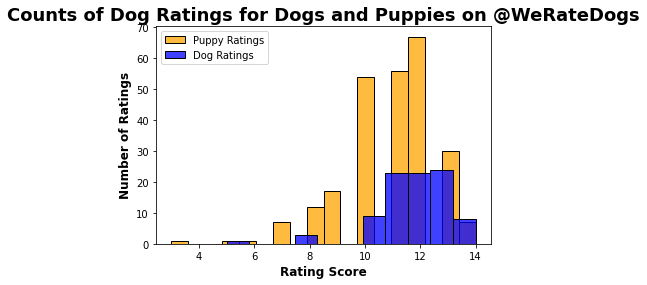

In [90]:
sns.histplot(df_pups['rating_numerator'], kde=False, color = 'orange', label='Puppy Ratings')
sns.histplot(df_dogs['rating_numerator'], kde=False, color = 'blue', label='Dog Ratings')
plt.title(f'Counts of Dog Ratings for Dogs and Puppies on @WeRateDogs', fontsize = 18, weight = 'bold')
plt.xlabel('Rating Score', fontsize = 12, weight = 'bold')
plt.ylabel('Number of Ratings', fontsize = 12, weight = 'bold')
plt.legend();

We can see here that puppies (puppos + puppers) have far more scores than dogs (floors + doggos) do. However, the ratings for dogs appear to be more tightly concentrated around 12 than the ratings for puppies, which are more spread out (higher variance). We can check this observation mathematically:

In [91]:
print(f"The mean for puppy rating is {np.mean(df_pups.rating_numerator)}")
print(f"The median for puppy rating is {np.median(df_pups.rating_numerator)}")
print(f"The variance for puppy rating is {np.var(df_pups.rating_numerator)}")

The mean for puppy rating is 10.910158102766799
The median for puppy rating is 11.0
The variance for puppy rating is 2.82620867065569


In [92]:
print(f"The mean for dog rating is {np.mean(df_dogs.rating_numerator)}")
print(f"The median for dog rating is {np.median(df_dogs.rating_numerator)}")
print(f"The variance for dog rating is {np.var(df_dogs.rating_numerator)}")

The mean for dog rating is 11.780219780219781
The median for dog rating is 12.0
The variance for dog rating is 2.28136698466369


This shows that while puppos have many more ratings than doggos, on average, dog ratings are actually higher. Puppers seem to have a higher variance in their ratings, especially at the low end. The lower number of 14's could be explained by the fact that pups are less capable of doing heroic things than older, mature, trained dogs, which is something that will earn 14's. This is evident with the first two 14's to be given out, the first to a dog who saved another dog's life and the second to a dog who searched for survivors at the wreckage of the World Trade Center. Pups lack vocational training and instead try to skate by on their youthful good looks, something that is undeniably adorable but fleeting in the long run. If puppers want to raise their overall perception on the internet, they clearly need to start working harder. 

<a id='question2'></a>
**Do puppies or full grown dogs tend to get greater engagement?** <br>
I was also curious if puppies or grown dogs would get higher engagement on Twitter, in the form of retweets and favorites. Again, while data is not available for all dogs in the dataset, those identified as 'puppers' or 'puppos' can be assumed to be puppies, and those identified as 'floofers' or 'doggos' can be assumed to be grown dogs. Total engagement (retweets + favorites) could be compared for each group, to determine if one group or the other gets higher engagement. My suspicion was that this would generally track with ratings, but I also suspected that puppies would have higher ratings and was surprised that this was not the case. Given that dogs had the higher ratings on average, I'm suspecting that they'll also have higher engagement too.

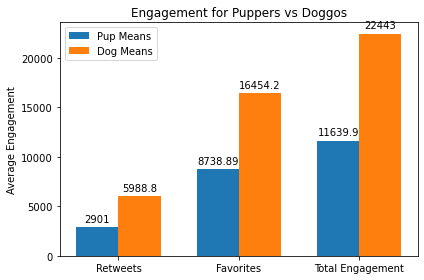

In [93]:
labels = ['Retweets', 'Favorites', 'Total Engagement']
pup_means = [np.mean(df_pups.retweet_count), np.mean(df_pups.favorite_count), np.mean(df_pups.total_engagement)]
dog_means = [np.mean(df_dogs.retweet_count), np.mean(df_dogs.favorite_count), np.mean(df_dogs.total_engagement)]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pup_means, width, label = "Pup Means")
rects3 = ax.bar(x + width/2, dog_means, width, label = "Dog Means")
ax.set_title('Engagement for Puppers vs Doggos')
ax.set_ylabel('Average Engagement')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

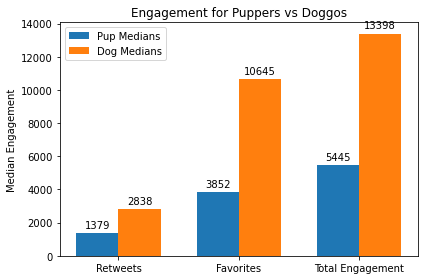

In [94]:
labels = ['Retweets', 'Favorites', 'Total Engagement']
pup_medians = [np.median(df_pups.retweet_count), np.median(df_pups.favorite_count), np.median(df_pups.total_engagement)]
dog_medians = [np.median(df_dogs.retweet_count), np.median(df_dogs.favorite_count), np.median(df_dogs.total_engagement)]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects2 = ax.bar(x - width/2, pup_medians, width, label = 'Pup Medians')
rects4 = ax.bar(x + width/2, dog_medians, width, label = 'Dog Medians')
ax.set_title('Engagement for Puppers vs Doggos')
ax.set_ylabel('Median Engagement')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects2, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()

We can see that the dogs have a considerably larger engagement on Twitter than pups. Whether looking at the mean or the median as a measure of center, we can see that dogs get twice as much engagement in terms of retweets and favorites. While I did expect dogs to have higher engagement based on finding that they have higher ratings, I was not expecting the difference to be this significant. 

<a id='question3'></a>
**What is the relationship between engagement with a tweet and the rating issued to a dog?** <br>
By graphing a scatter plot of the 'total_engagement' metric (retweets + favorites received by a tweet) against the rating issued to a dog in that tweet, we can see the relationship between a dog's rating and engagement by other users on Twitter. As higher ratings reflect funnier or cuter dogs, I would expect to a see a positive linear relationship here, as people engage more with things that are particularly cute or funny. Note that at this point, I'm not looking strictly at "grown dogs" as in the prior two questions, but at all dogs in the @WeRateDogs dataset. 

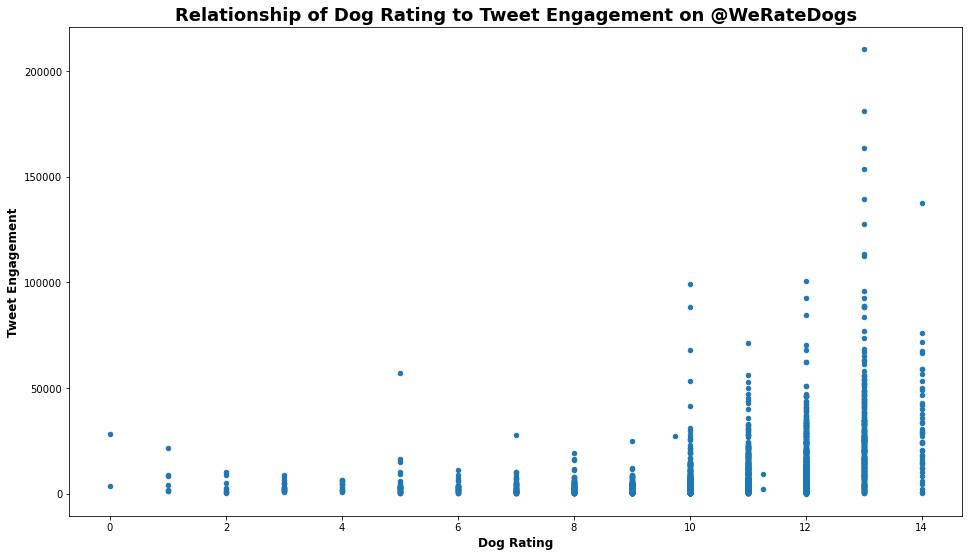

In [95]:
df_master.plot(x = 'rating_numerator', y = 'total_engagement', kind = 'scatter', figsize = (16, 9));
plt.title(f'Relationship of Dog Rating to Tweet Engagement on @WeRateDogs', fontsize = 18, weight = 'bold')
plt.xlabel('Dog Rating', fontsize = 12, weight = 'bold')
plt.ylabel('Tweet Engagement', fontsize = 12, weight = 'bold');

In [96]:
df_master['rating_numerator'].corr(df_master['total_engagement'])

0.3727836157019072

In the graph above, we can definitely see an effect where higher ratings get higher engagement. This effect is not as strong as I would've suspected though, with a correlation of only 0.37, a moderately positive linear relationship. One thing I had considered was that engagement might not be linear and might instead be parabolic in nature, with an increase at low ratings because low ratings might consist of "roasting" or "dunking on" a dog (or more likely, the dog's owner). Given the nature of how Twitter (and social media in general) loves to pile on people, this could also drive engagement on low scores. Given the small sample size at the low end of the ratings, this could be problematic as a conclusion, but we do see a slight uptick at the 0 and 1 ratings that indicates such a relationship may exist.

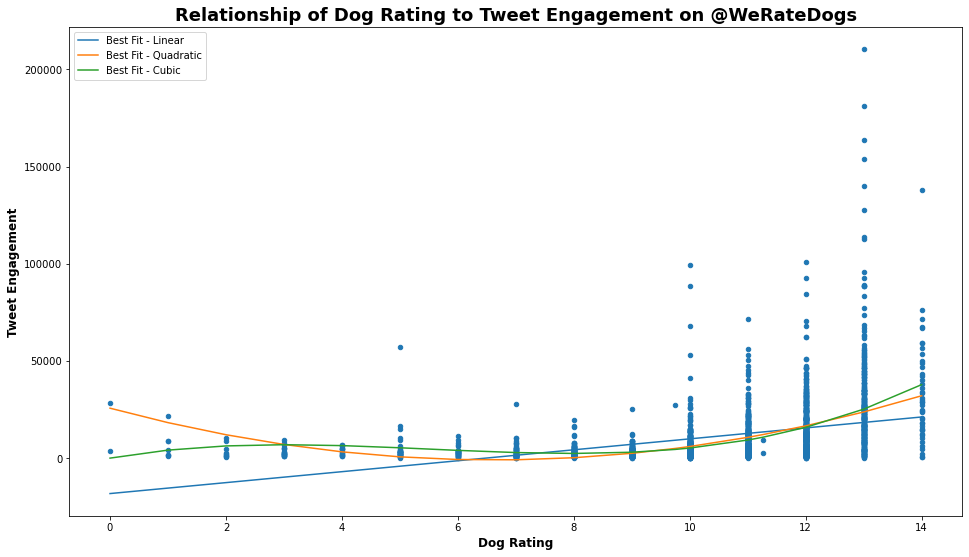

In [97]:
x = df_master.rating_numerator # PolyFit doesn't always play nice without this defined separately 
y = df_master.total_engagement # PolyFit doesn't always play nice without this defined separately 
df_master.plot(x = 'rating_numerator', y = 'total_engagement', kind = 'scatter', figsize = (16, 9));
plt.title(f'Relationship of Dog Rating to Tweet Engagement on @WeRateDogs', fontsize = 18, weight = 'bold')
plt.xlabel('Dog Rating', fontsize = 12, weight = 'bold')
plt.ylabel('Tweet Engagement', fontsize = 12, weight = 'bold')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), label = 'Best Fit - Linear')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)), label = 'Best Fit - Quadratic')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 3))(np.unique(x)), label = 'Best Fit - Cubic')
plt.legend();

Placing "Best Fit" lines on the scatter plot for a linear relationship, a quadratic relationship, and a cubic one, its clear that the quadratic and cubic fits are more accurate than the basic linear fit. The cubic fit appears to be closer than the quadratic at the high end (ratings of 14 in particular), but the quadratic fit is much closer than the cubic at the low end (ratings of 0, maybe at 1 as well). This might lead to a conclusion that the quadratic line has an overall better fit here, but the small amount of data at the low end would mitigate the higher performance. As a result, I would say the cubic fit is probably the most accurate, and that the relationship between dog rating and tweet engagement is non-linear. 

<a id='conclusion'></a>
## Conclusion

As mentioned in my analysis, I'm somewhat surprised that puppies do not get higher ratings and engagement than dogs. In my experience, "cute" and "funny" both drive engagement on social media, perhaps only behind "anger" and "outrage". I tend to find puppies cuter and often funnier than dogs, so I expected to see that borne out by both their ratings and their engagement on social media. This ended up not being the case, and as mentioned, there may be some reasons for this. At least by @WeRateDogs' criteria for issuing ratings, the highest ratings tend to require acts by the dog in question that elevate beyond cuteness, which puppies are simply going to be less equipped for. While that may explain why puppies tend not to get the absolute highest ratings, it does not account for why their ratings are also more spread out among the low ratings (below 10). There are 421 ratings below 10 within the master dataset, 39 of which are puppies, and it would be necessary to dig through these manually to start trying to find patterns that would explain this variance at the low end of the scale for pups relative to grown dogs.

Regarding the trends between engagement and dog ratings, I wasn't particularly surprised to see that the relationship between the two was non-linear. There is a truism that ["Each day on Twitter, there is one main character. The goal is to never be it."](https://twitter.com/maplecocaine/status/1080665226410889217) which refers to the fact that there is generally either someone being absolutely loved or being absolutely hated each day on social media, with really no in between. When looking at a scale of ratings, this obviously relates to how the extreme ends of the scale (low *or* high) are more interesting or evoking a stronger reaction than the mushy middle of things which are merely "fine". What was more interesting about this was that the cubic best fit line seemed to approximate the real data better than the quadratic one. I had expected that if a non-linear relationship existed, it would've been parabolic in nature, with peaks at the extremes of the scale. This would seem to indicate a local peak in the low-middle part of the rating scale (around 4, on the graph above) and a lack of engagement with ratings further below that. Why this would be, I'm unable to explain without further analysis, but it must be acknowledged that the low end of the scale suffers from small sample size. A larger sample size might lead to more insight here, and it might lead to the quadratic best fit line becoming the better approximation of the whole. 

<a id='references'></a>
## References
There were several resources used in completing this project, alongside my existing notes to this point. These references included: 

[@WeRateDogs Twitter](https://twitter.com/dog_rates/)
For some needed laughs as I was trawling my way through several years old tweets.

[StackOverflow](https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan)
For getting all of the dog_stage columns easily switched from 'None' to NaN with a single dictionary.

[StackOverflow](https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe)
For explaining why my concatenation of NaNs and strings was failing, and how to make it work correctly.

[Udacity Knowledge Forum](https://knowledge.udacity.com/questions/280182)
For help with reading from tweet_json.txt into a dataframe. 

[StackOverflow](https://stackoverflow.com/questions/41157981/pandas-convert-float-in-scientific-notation-to-string)
I'm fairly sure this was a fellow Udacity student, and their help was invaluable for getting the `reply_id` fields converted correctly into strings from floats in scientific notation.

[TablesGenerator](https://www.tablesgenerator.com/markdown_tables)
For making it way easier to organize my observations into nice neat tables.

[StackOverflow](https://stackoverflow.com/a/52547461/16507150)
For showing how to drop rows based on a column value (I was close!).

[StackOverflow](https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python)
For how to generate non-linear best fits and apply them to my plots.

[StackOverflow](https://stackoverflow.com/questions/34192290/ipython-notebook-elegant-way-of-turning-off-part-of-cells)
For how to keep Jupyter Notebook from running the Tweepy cell in the absence of API keys.